## Data dictionary for the given dataset:

id: Unique identifier for each individual.

age: Age of the individual in years.

bp: Blood pressure of the individual.

sg: Specific gravity of the individual's urine.

al: Albumin level in the individual's urine.

su: Sugar level in the individual's urine.

rbc: Presence of red blood cells in the individual's urine (normal or abnormal).

pc: Presence of pus cells in the individual's urine (normal or abnormal).

pcc: Presence of pus cell clumps in the individual's urine (present or not present).

ba: Presence of bacteria in the individual's urine (present or not present).

pcv: Packed cell volume, a measure of the volume percentage of red blood cells in the blood.

wc: White blood cell count.

rc: Red blood cell count.

htn: Whether the individual has hypertension (yes or no).

dm: Whether the individual has diabetes mellitus (yes or no).

cad: Whether the individual has coronary artery disease (yes or no).

appet: Appetite of the individual (good or poor).

pe: Whether the individual has pedal edema (yes or no).

ane: Whether the individual has anemia (yes or no).

classification: Classification indicating whether the individual has chronic kidney disease (ckd) or not.


In [4]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Loading the CKD dataset from a CSV file into a pandas DataFrame
Dataset = pd.read_csv('kidney_disease.csv')

In [6]:
# Showing the entire DataFrame (in Jupyter) to inspect its contents
Dataset

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [7]:
# Displaying basic information about the dataset:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [8]:
# Renaming columns for better readability and clarity
Dataset.rename(columns=
            {'bp': 'blood_pressure',
             'sg': 'specific_gravity',
             'al':'albumin',
             'su':'sugar',
             'rbc':'red_blood_cells',
             'pc':'pus_cell',
             'pcc':'pus_cell_clumps',
             'ba':'bacteria',
             'bgr':'blood_glucose_random',
             'bu':'blood_urea',
             'sc':'serum_creatinine',
             'sod':'sodium',
             'pot':'potassium',
             'hemo':'hemoglobin',
             'pcv':'packed_cell_volume',
             'wc':'white_blood_cell_count',
             'rc':'red_blood_cell_count',
             'htn':'hypertension',
             'dm':'diabetes_mellitus',
             'cad':'coronary_artery_disease',
             'appet':'appetite',
             'pe':'pedal edema',
             'ane':'anemia',
             'classification':'class'},inplace=True)

In [9]:
# Displaying the dataset again to confirm that column names have been successfully updated
Dataset

,id,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal edema,anemia,class
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [10]:
# Checking for missing values in each column
Dataset.isnull().sum()

id                           0
age                          9
blood_pressure              12
specific_gravity            47
albumin                     46
sugar                       49
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
sodium                      87
potassium                   88
hemoglobin                  52
packed_cell_volume          70
white_blood_cell_count     105
red_blood_cell_count       130
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
pedal edema                  1
anemia                       1
class                        0
dtype: int64

In [11]:
# Displaying all rows that contain at least one missing value
Dataset[Dataset.isna().any(axis=1)]

,id,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal edema,anemia,class
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
5,5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,350,65.0,70.0,1.025,0.0,0.0,NaN,NaN,notpresent,notpresent,...,43,9600,4.5,no,no,no,good,no,no,notckd
363,363,67.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,44,5900,5.2,no,no,no,good,no,no,notckd
365,365,24.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,NaN,10700,6.3,no,no,no,good,no,no,notckd
378,378,71.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,42,7700,5.5,no,no,no,good,no,no,notckd


In [12]:
# Dropping the 'id' column since it does not contribute to the analysis
Dataset.drop('id', inplace = True, axis = 1)

In [13]:
# Importing the warnings library to manage warning messages
import warnings
warnings.filterwarnings("ignore")

In [14]:
# Filling missing values in the 'age' column with the column's mean
Dataset['age'].fillna(Dataset['age'].mean(), inplace = True)

In [15]:
# Converting the 'age' column to integer data type
Dataset['age'] = Dataset['age'].astype('int')

In [16]:
# Converting the 'packed_cell_volume' column to numeric, making invalid entries (non-numeric values) convert to NaN
Dataset['packed_cell_volume'] = pd.to_numeric(Dataset['packed_cell_volume'], errors = "coerce")

In [17]:
# Convert the 'white_blood_cell_count' column to numeric, making invalid entries (non-numeric values) convert to NaN
Dataset['white_blood_cell_count'] = pd.to_numeric(Dataset['white_blood_cell_count'], errors = "coerce")

In [18]:
# Convert the 'red_blood_cell_count' column to numeric, making invalid entries (non-numeric values) convert to NaN
Dataset['red_blood_cell_count'] = pd.to_numeric(Dataset['red_blood_cell_count'], errors = "coerce")

In [19]:
# Checking for missing values again after converting columns to numeric
Dataset.isnull().sum()

age                          0
blood_pressure              12
specific_gravity            47
albumin                     46
sugar                       49
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
sodium                      87
potassium                   88
hemoglobin                  52
packed_cell_volume          71
white_blood_cell_count     106
red_blood_cell_count       131
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
pedal edema                  1
anemia                       1
class                        0
dtype: int64

In [20]:
# Selecting all numeric columns (int and float types) from the dataset and assigning them to a variable
numeric_features = Dataset.select_dtypes(include = ['int', 'float'])

In [21]:
# Selecting all categorical columns (object types) from the dataset and assigning them to a variable
categorical_features = Dataset.select_dtypes(include = 'object')

In [22]:
# Displaying the categorical features to inspect their values and structure
categorical_features

,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal edema,anemia,class
0,NaN,normal,notpresent,notpresent,yes,yes,no,good,no,no,ckd
1,NaN,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
2,normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes,ckd
3,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes,ckd
4,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...
395,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd
396,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd
397,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd
398,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd


In [23]:
# Display the numeric features to inspect their values and structure
numeric_features

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,hemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count
0,48,80.0,1.020,1.0,0.0,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2
1,7,50.0,1.020,4.0,0.0,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN
2,62,80.0,1.010,2.0,3.0,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN
3,48,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9
4,51,80.0,1.010,2.0,0.0,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55,80.0,1.020,0.0,0.0,140.0,49.0,0.5,150.0,4.9,15.7,47.0,6700.0,4.9
396,42,70.0,1.025,0.0,0.0,75.0,31.0,1.2,141.0,3.5,16.5,54.0,7800.0,6.2
397,12,80.0,1.020,0.0,0.0,100.0,26.0,0.6,137.0,4.4,15.8,49.0,6600.0,5.4
398,17,60.0,1.025,0.0,0.0,114.0,50.0,1.0,135.0,4.9,14.2,51.0,7200.0,5.9


In [24]:
# Fill missing values in each numeric column with the column's mean
for features in numeric_features:
    Dataset[features].fillna(Dataset[features].mean(), inplace = True)

In [25]:
# Fill missing values in each categorical column with the most frequent value (mode)
for features in categorical_features:
        Dataset[features].fillna(Dataset[features].value_counts().index[0], inplace = True)

In [26]:
# Check again for any remaining missing values in the dataset
Dataset.isnull().sum()

age                        0
blood_pressure             0
specific_gravity           0
albumin                    0
sugar                      0
red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
blood_glucose_random       0
blood_urea                 0
serum_creatinine           0
sodium                     0
potassium                  0
hemoglobin                 0
packed_cell_volume         0
white_blood_cell_count     0
red_blood_cell_count       0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
pedal edema                0
anemia                     0
class                      0
dtype: int64

In [27]:
# Printing the value counts for each categorical feature to help inspect class distribution, spot typos, and understand category balance
for i in categorical_features:
    print(Dataset[i].value_counts())
    print('-----------------------------------')    

red_blood_cells
normal      353
abnormal     47
Name: count, dtype: int64
-----------------------------------
pus_cell
normal      324
abnormal     76
Name: count, dtype: int64
-----------------------------------
pus_cell_clumps
notpresent    358
present        42
Name: count, dtype: int64
-----------------------------------
bacteria
notpresent    378
present        22
Name: count, dtype: int64
-----------------------------------
hypertension
no     253
yes    147
Name: count, dtype: int64
-----------------------------------
diabetes_mellitus
no       260
yes      134
\tno       3
\tyes      2
 yes       1
Name: count, dtype: int64
-----------------------------------
coronary_artery_disease
no      364
yes      34
\tno      2
Name: count, dtype: int64
-----------------------------------
appetite
good    318
poor     82
Name: count, dtype: int64
-----------------------------------
pedal edema
no     324
yes     76
Name: count, dtype: int64
-----------------------------------
anemia
no  

In [28]:
# Standardizing inconsistent values in the 'diabetes_mellitus' column
Dataset['diabetes_mellitus'].replace({'\tno': 'no',
                                     '\tyes': 'yes',
                                     ' yes': 'yes'}, inplace = True)

In [29]:
# Standardizing inconsistent values in the 'coronary_artery_disease' column
Dataset['coronary_artery_disease'].replace({'\tno': 'no'}, inplace = True)

In [30]:
# Standardizing the target labels in the 'class' column
Dataset['class'].replace({'ckd\t': 'ckd'}, inplace = True)

### Data Visualization

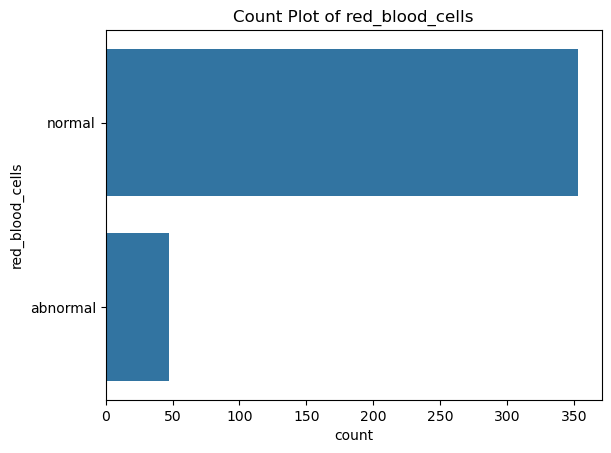

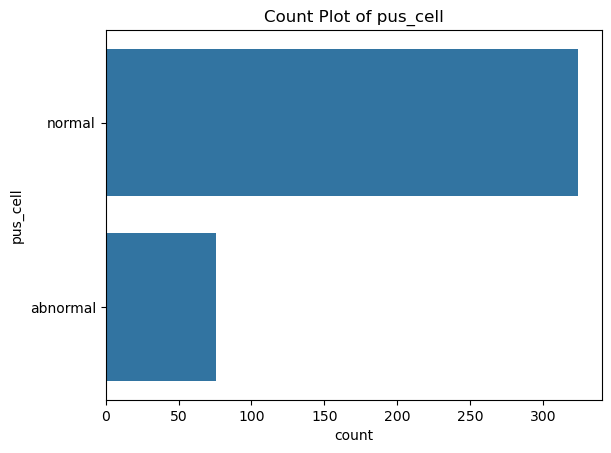

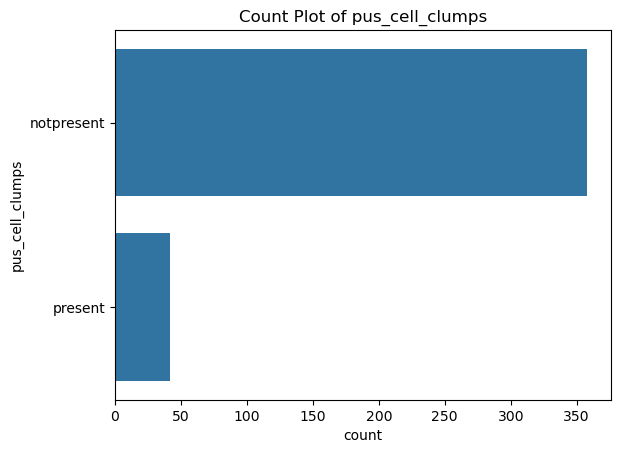

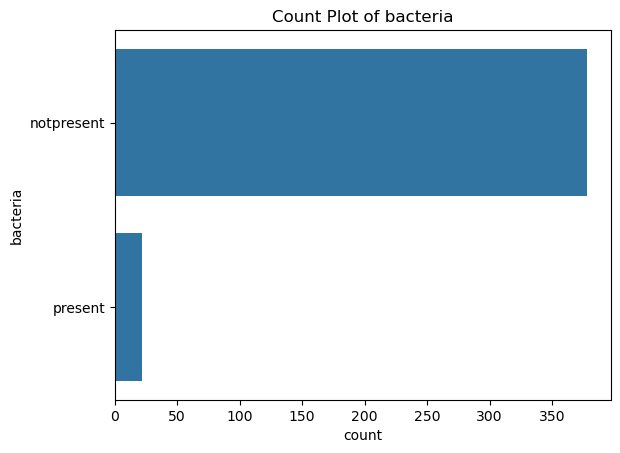

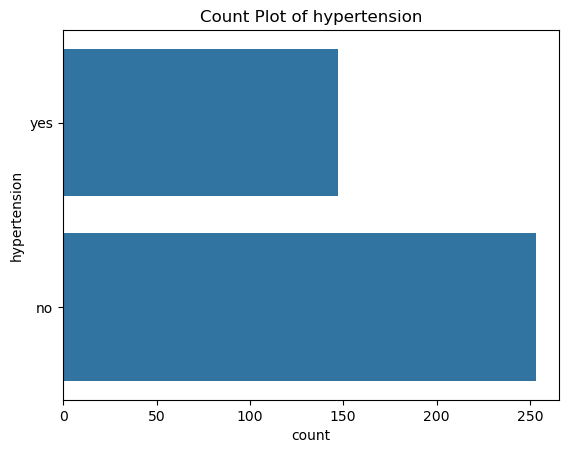

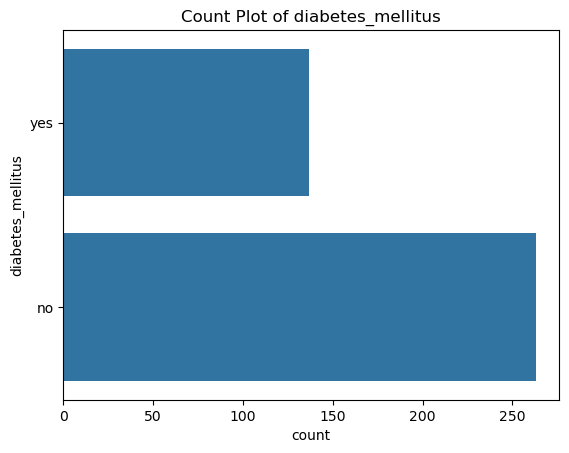

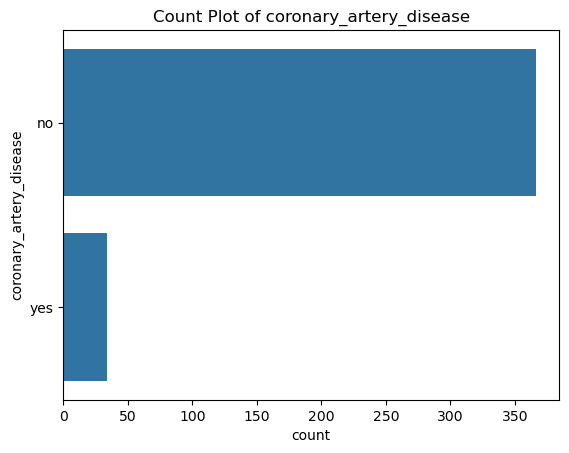

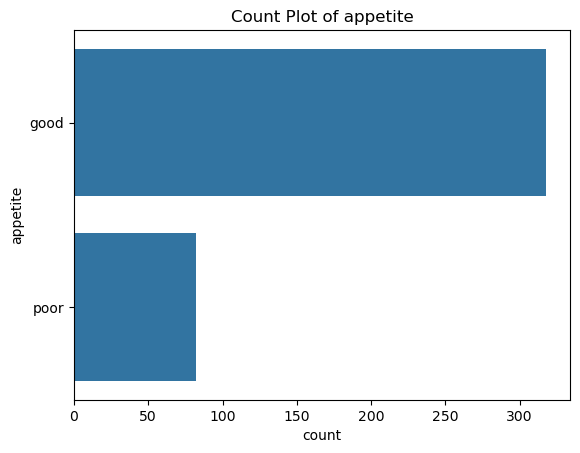

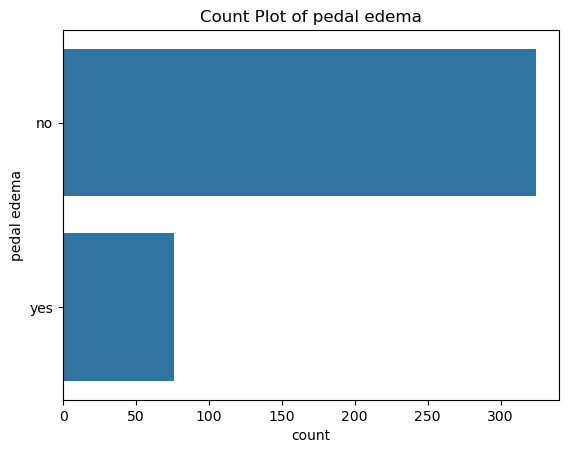

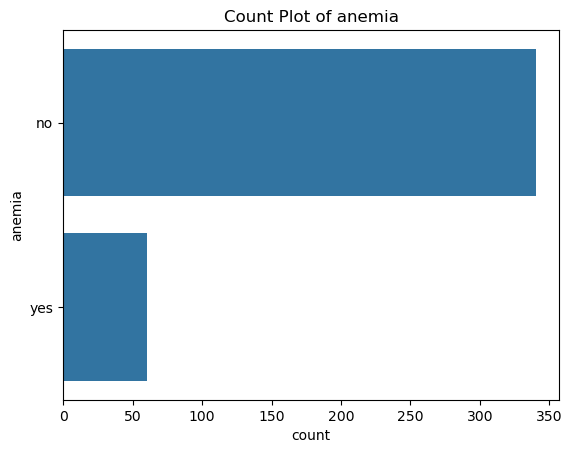

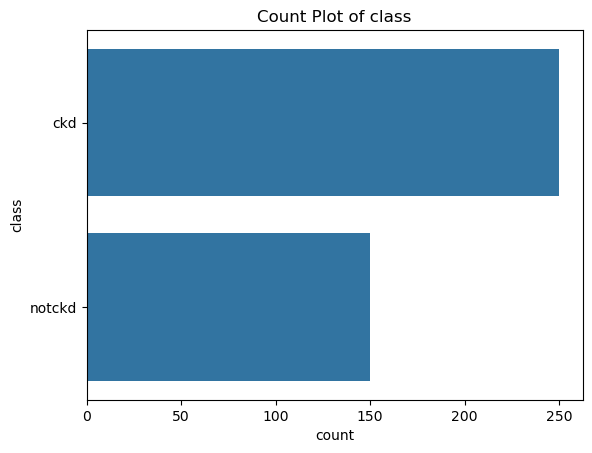

In [40]:
# Plotting count charts for each categorical feature
for i in categorical_features:
    sns.countplot(Dataset[i])
    plt.title(f'Count Plot of {i}')
    plt.show()

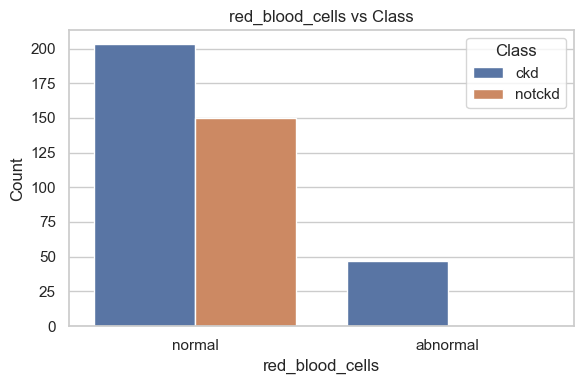

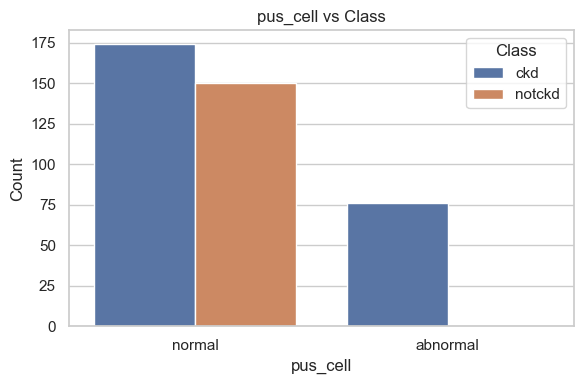

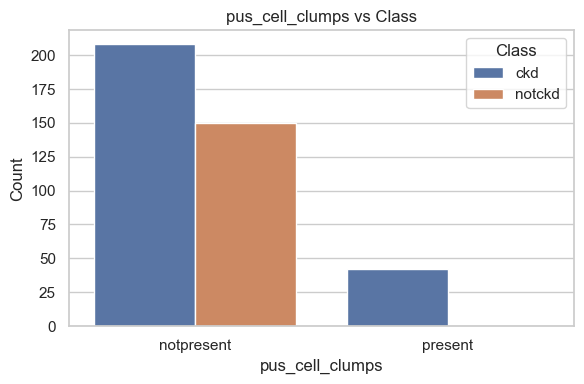

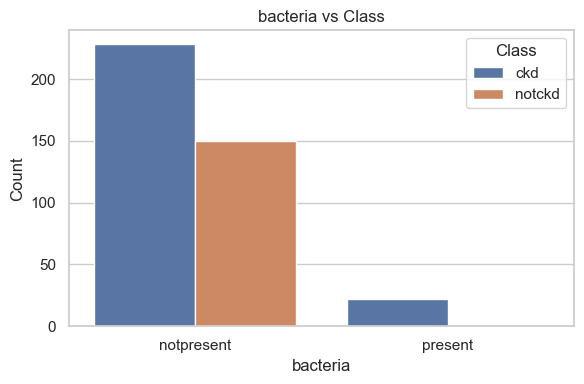

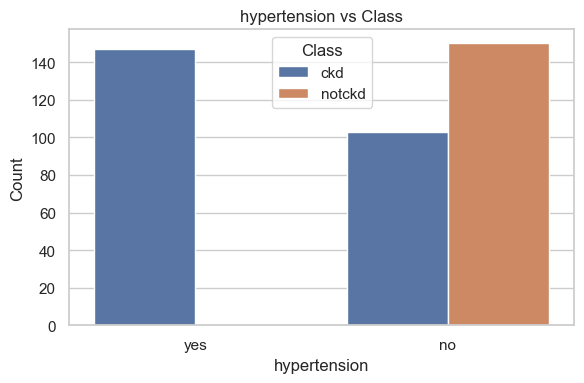

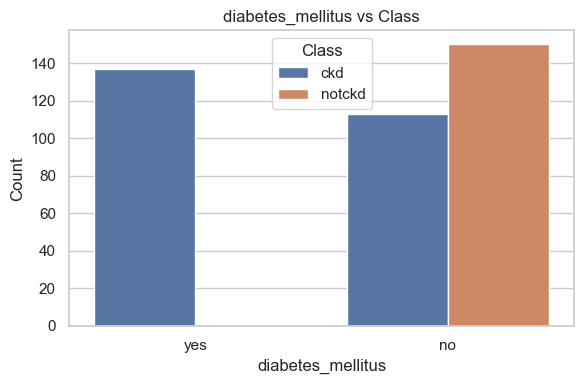

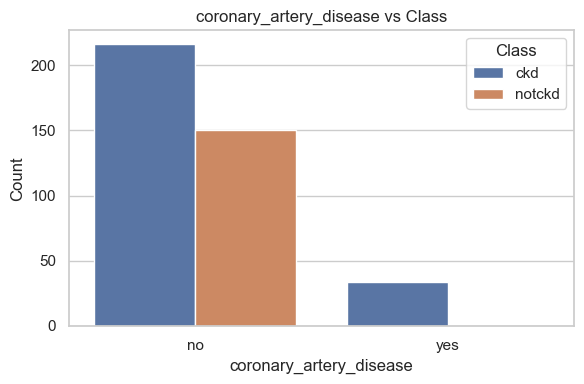

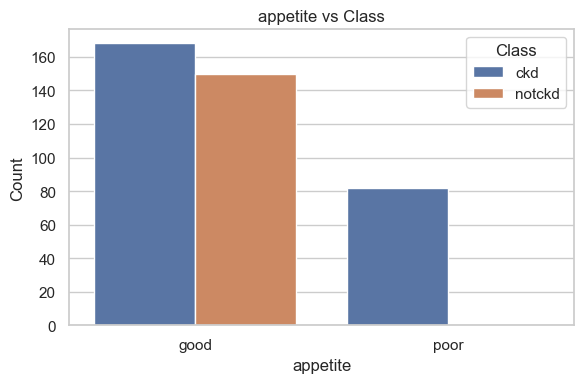

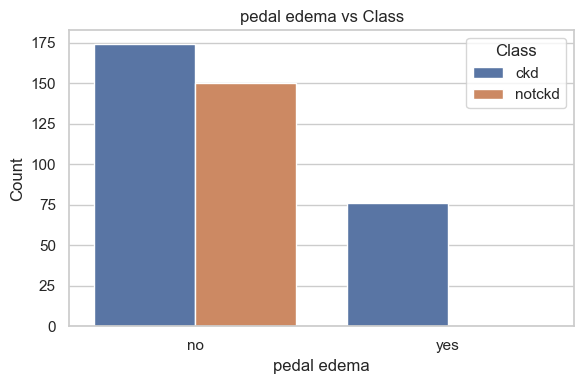

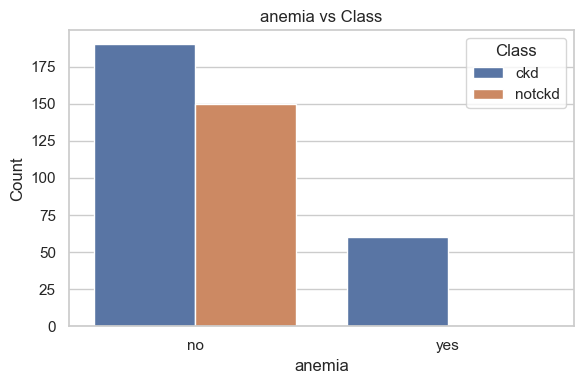

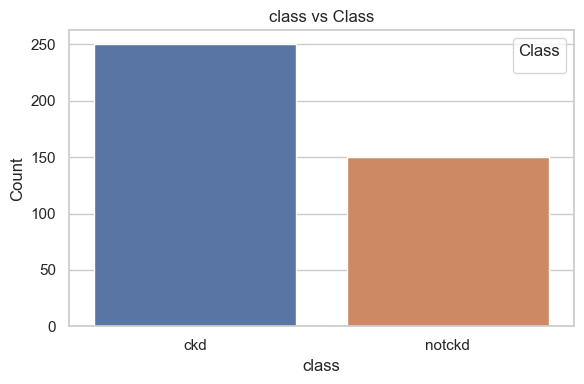

In [35]:
# Set seaborn style
sns.set(style="whitegrid")

# Loop through each categorical feature and plot
for feature in categorical_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=feature, hue='class', data=Dataset)
    plt.title(f'{feature} vs Class')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='Class')
    plt.tight_layout()
    plt.show()

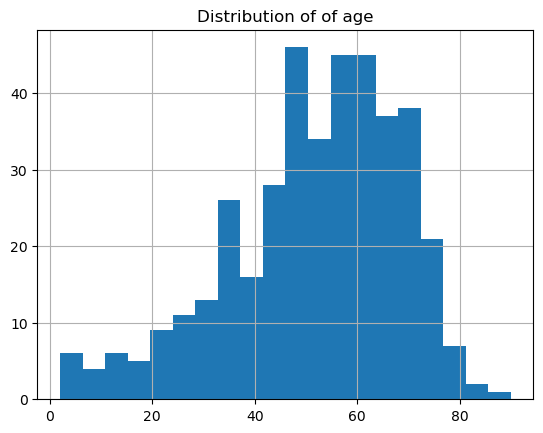

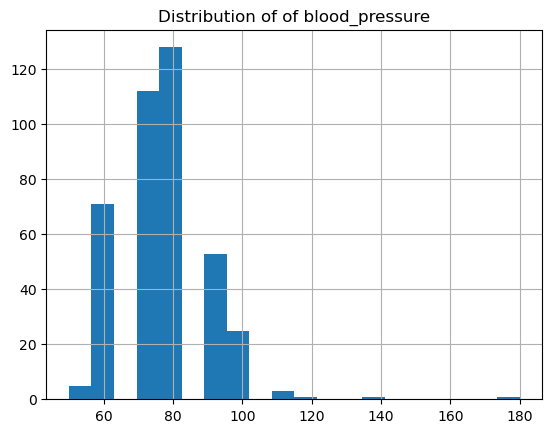

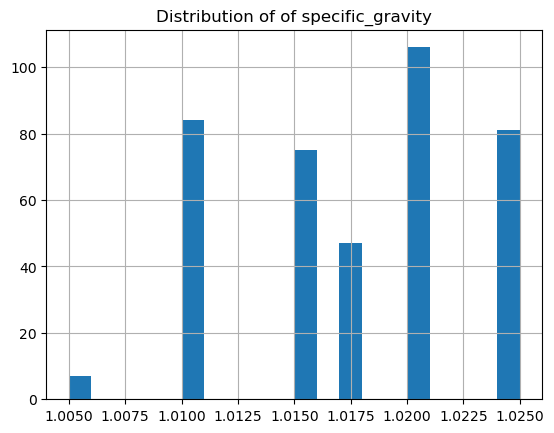

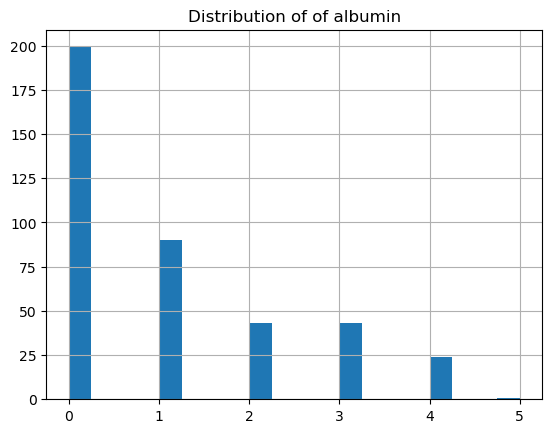

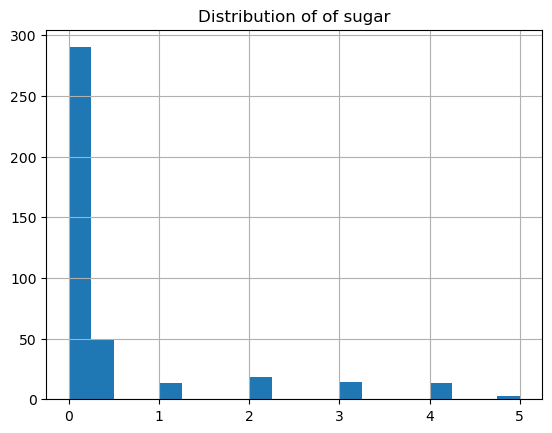

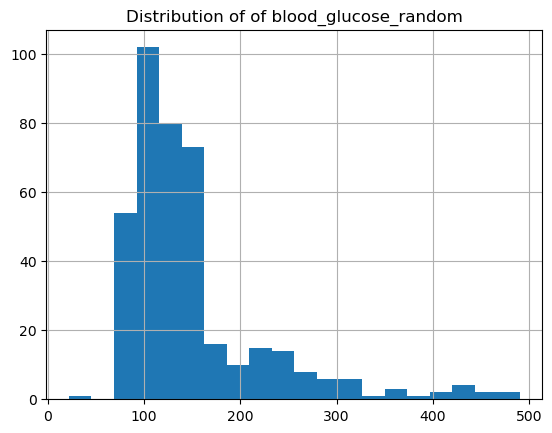

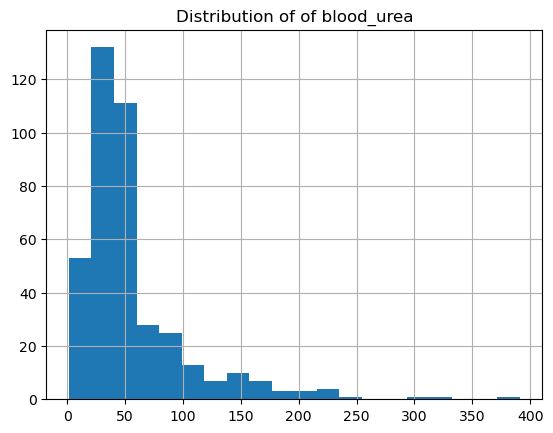

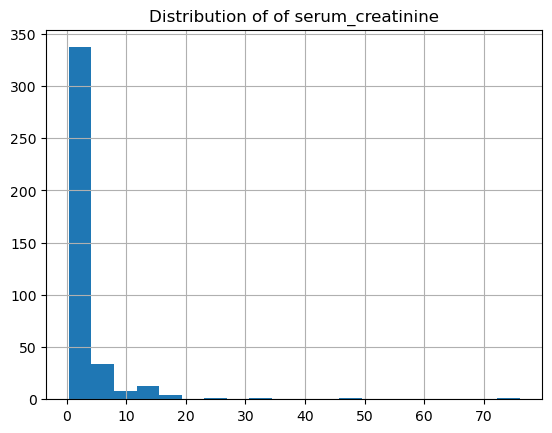

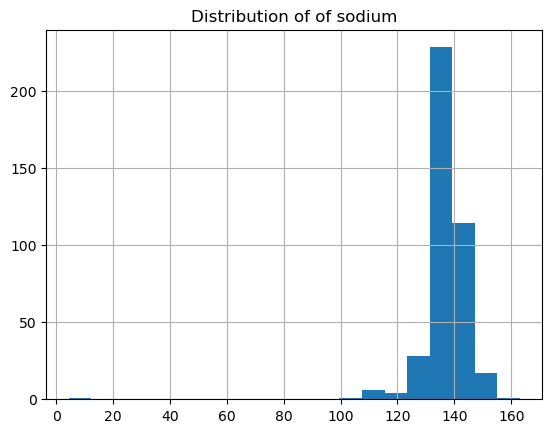

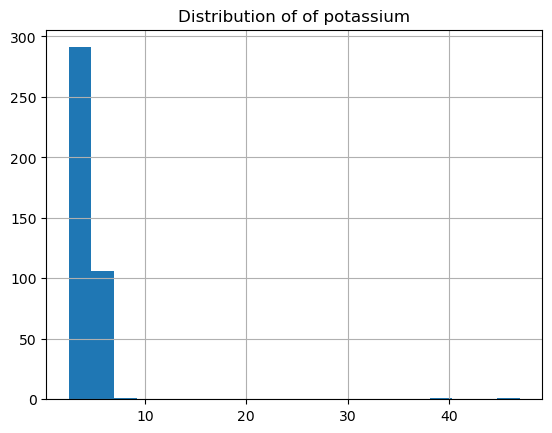

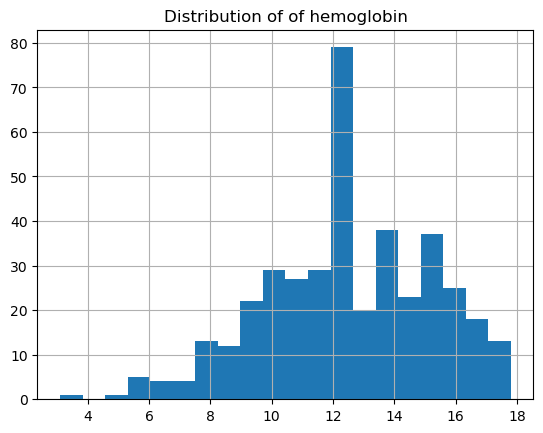

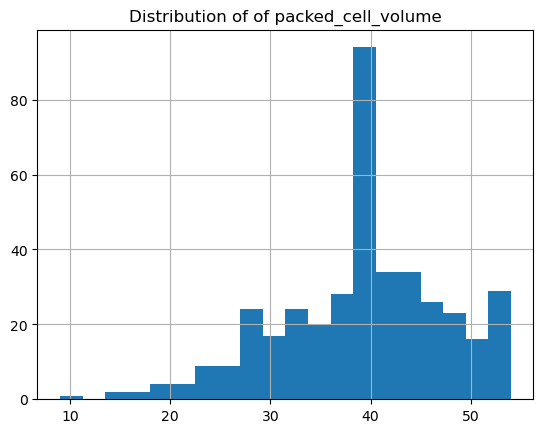

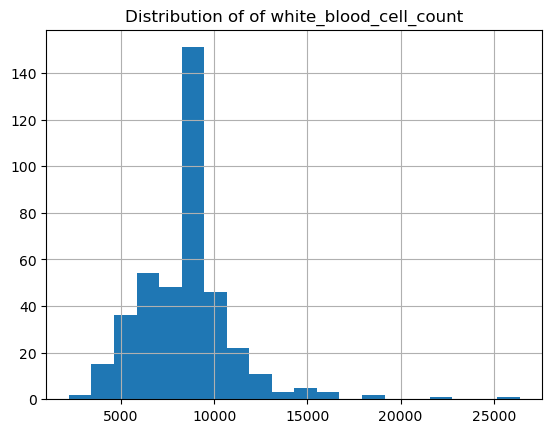

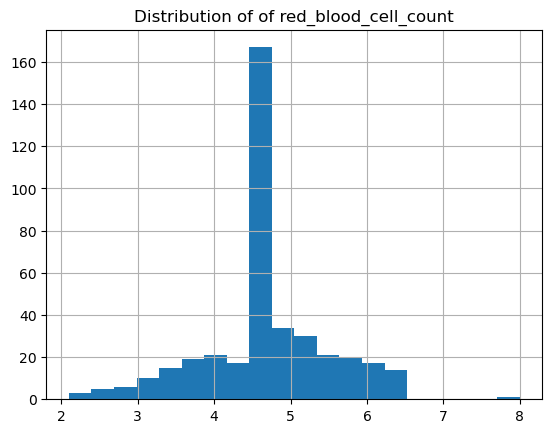

In [41]:
# Plotting histograms for each numeric feature
for i in numeric_features:
    Dataset[i].hist(bins = 20)
    plt.title(f'Distribution of of {i}')
    plt.show()

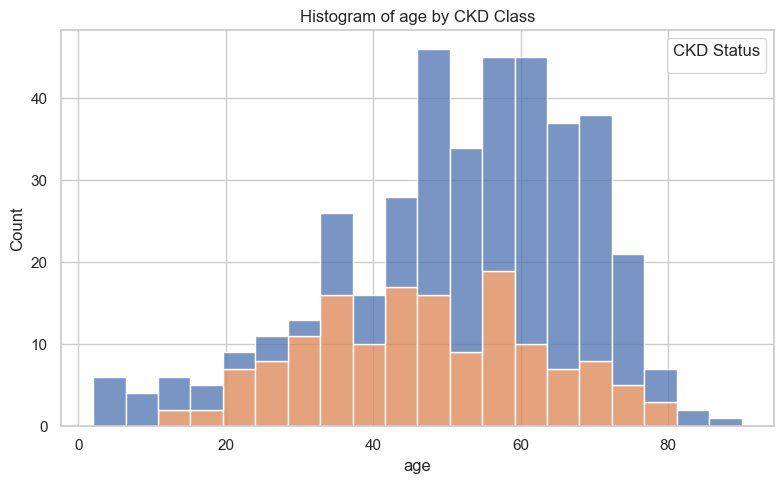

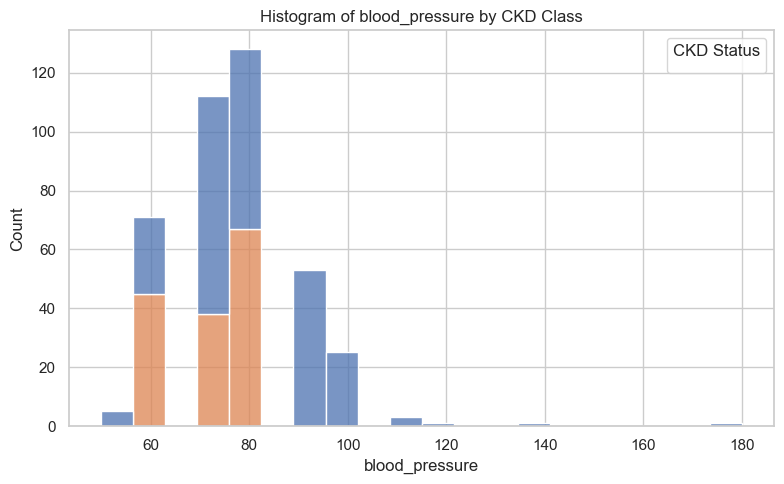

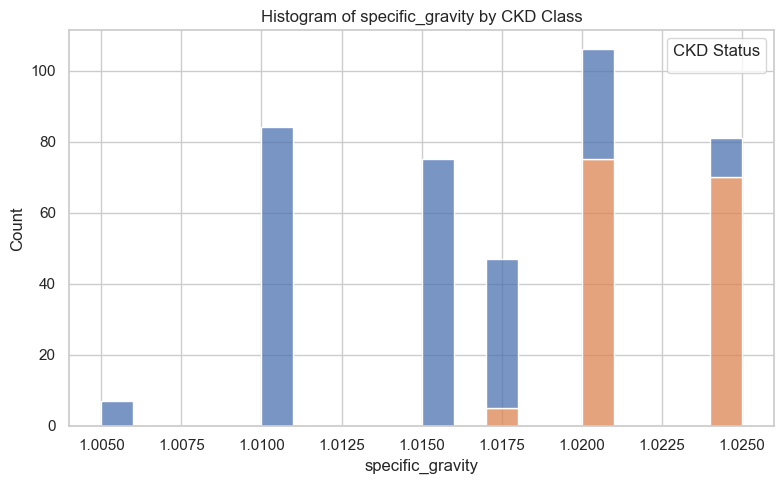

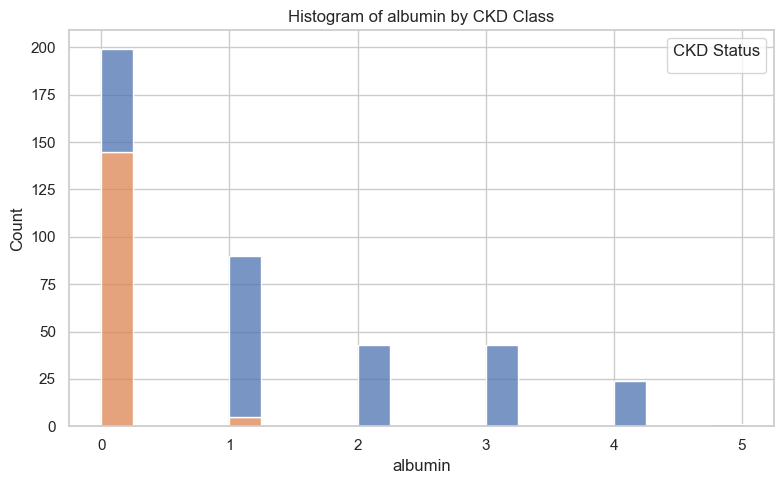

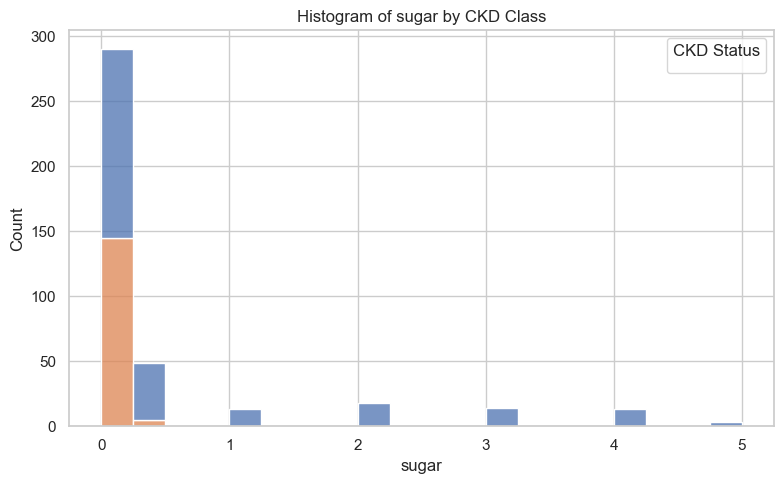

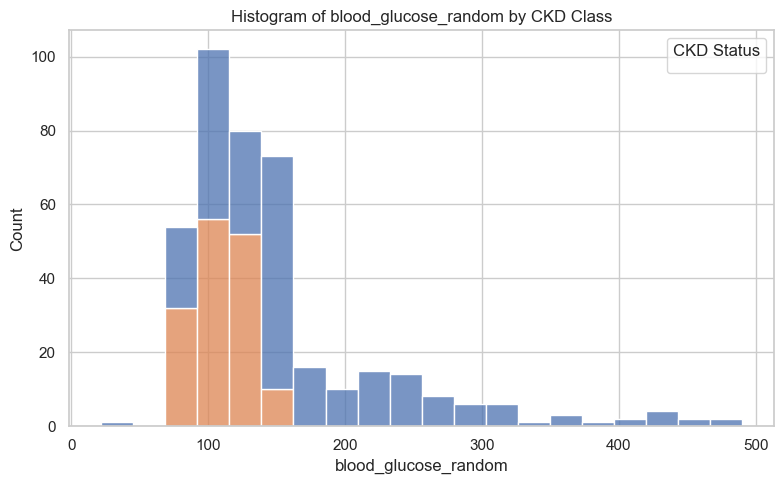

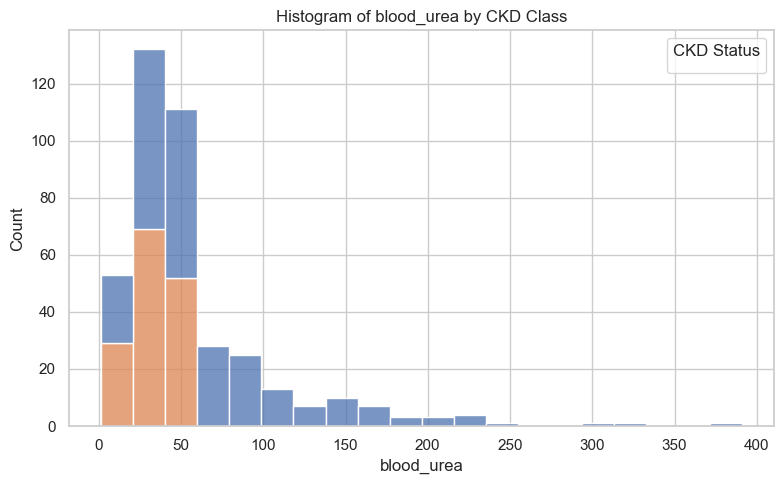

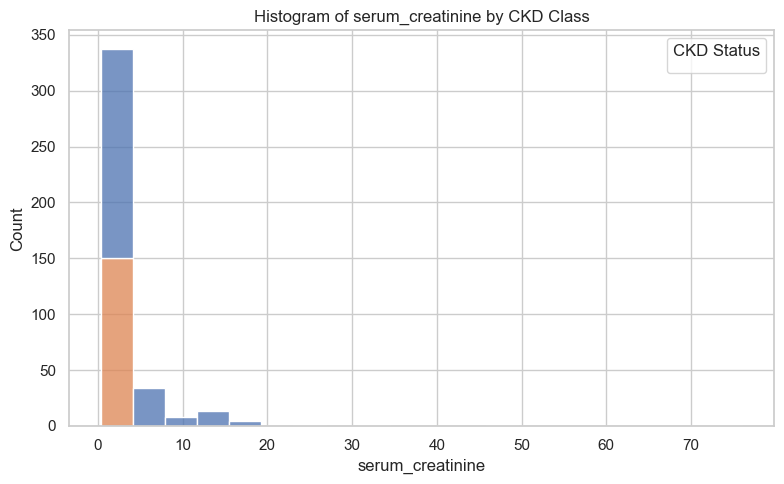

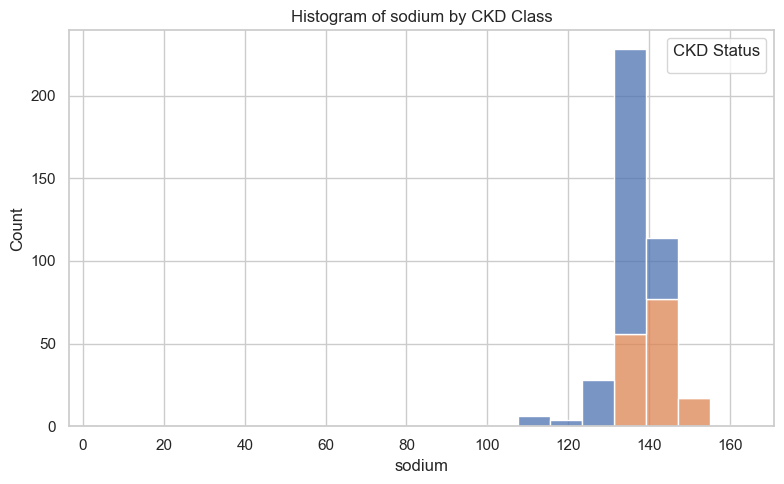

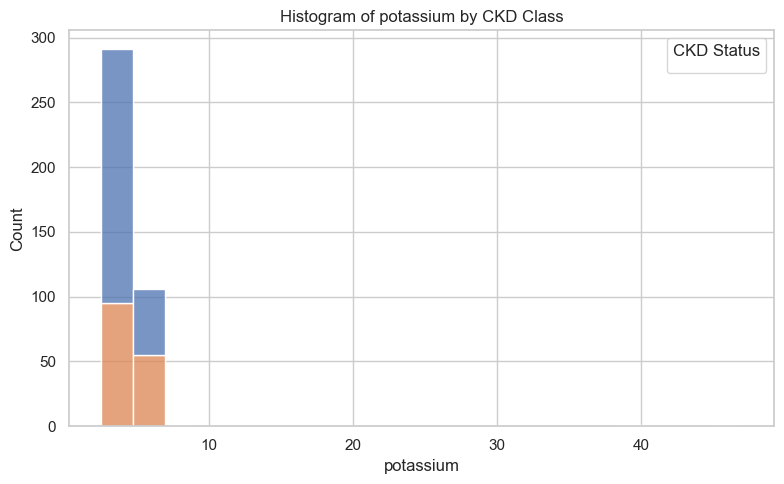

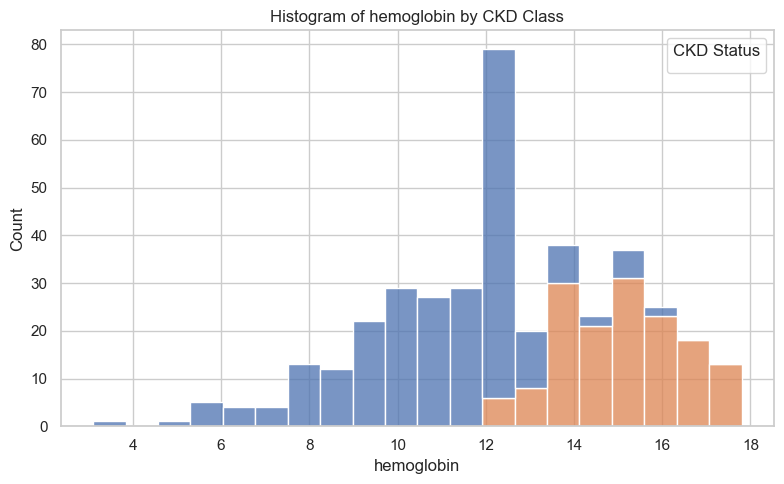

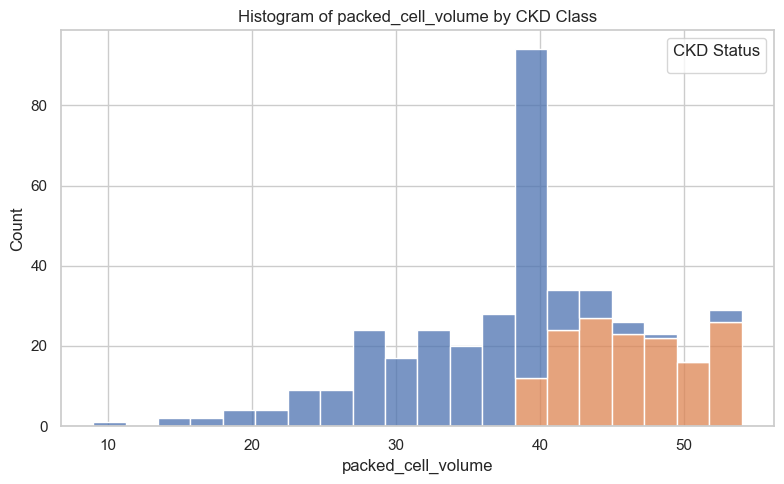

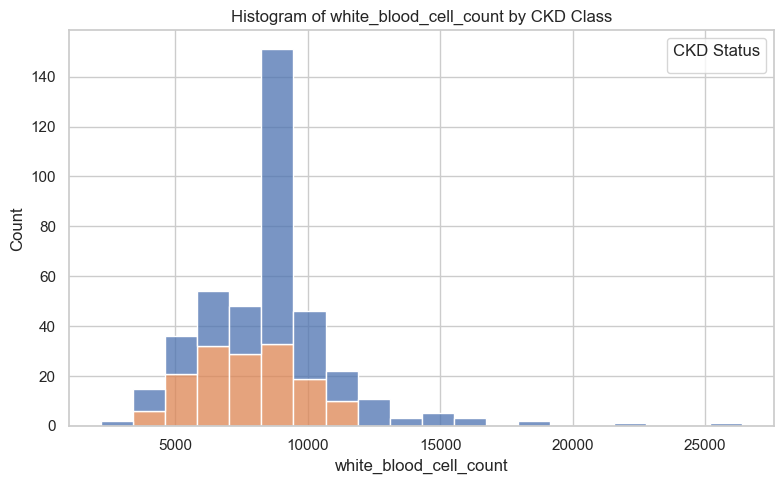

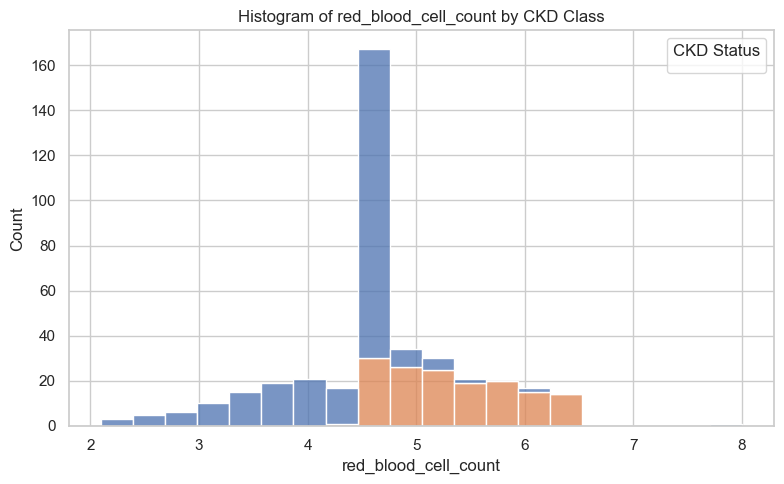

In [37]:
# Set plot style
sns.set(style="whitegrid")

# Plot histogram, hue is classification (CKD or not)
for col in numeric_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=Dataset, x=col, hue='class', kde=False, multiple='stack', bins=20)
    plt.title(f'Histogram of {col} by CKD Class')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='CKD Status')
    plt.tight_layout()
    plt.show()

In [42]:
# Displaying updated information about the dataset and confirming data types, non-null counts, and overall structure after cleaning
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      400 non-null    int32  
 1   blood_pressure           400 non-null    float64
 2   specific_gravity         400 non-null    float64
 3   albumin                  400 non-null    float64
 4   sugar                    400 non-null    float64
 5   red_blood_cells          400 non-null    object 
 6   pus_cell                 400 non-null    object 
 7   pus_cell_clumps          400 non-null    object 
 8   bacteria                 400 non-null    object 
 9   blood_glucose_random     400 non-null    float64
 10  blood_urea               400 non-null    float64
 11  serum_creatinine         400 non-null    float64
 12  sodium                   400 non-null    float64
 13  potassium                400 non-null    float64
 14  hemoglobin               4

In [44]:
# Encoding the target variable 'class' into numerical values
Dataset['class'].replace({'notckd': 0,
                         'ckd': 1}, inplace = True)

In [45]:
# Importing LabelEncoder to convert categorical text data into numerical labels
from sklearn.preprocessing import LabelEncoder

In [46]:
# Creating an instance of the LabelEncoder
le = LabelEncoder()

In [47]:
# Applying label encoding to all categorical features to convert string labels into numeric form for modelling
for col_name in categorical_features:
    Dataset[col_name] = le.fit_transform(Dataset[col_name])

In [48]:
# Calculating the correlation matrix between all numeric features to help identify strong positive or negative relationships
Dataset.corr()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal edema,anemia,class
age,1.000000,0.148046,-0.180310,0.114432,0.207903,-0.011353,-0.101898,0.159293,0.043727,0.214410,...,-0.211424,0.100055,-0.200928,0.393186,0.363334,0.233145,0.157888,0.094380,0.050237,0.225054
blood_pressure,0.148046,1.000000,-0.182463,0.146593,0.200784,-0.151369,-0.156856,0.059560,0.112173,0.149100,...,-0.292714,0.026067,-0.220822,0.270447,0.228250,0.086618,0.177601,0.054083,0.194962,0.290600
specific_gravity,-0.180310,-0.182463,1.000000,-0.466698,-0.287993,0.236228,0.345325,-0.290663,-0.220792,-0.326339,...,0.528437,-0.201311,0.466976,-0.366959,-0.393190,-0.154803,-0.246822,-0.272476,-0.213276,-0.698957
albumin,0.114432,0.146593,-0.466698,1.000000,0.268070,-0.373927,-0.535157,0.399749,0.367855,0.326400,...,-0.527242,0.200443,-0.454886,0.481724,0.378042,0.236745,0.330562,0.440893,0.282305,0.599238
sugar,0.207903,0.200784,-0.287993,0.268070,1.000000,-0.074324,-0.168826,0.151445,0.107684,0.639186,...,-0.202573,0.153274,-0.182278,0.293179,0.472330,0.246702,0.080648,0.130721,0.066348,0.327812
red_blood_cells,-0.011353,-0.151369,0.236228,-0.373927,-0.074324,1.000000,0.377394,-0.102948,-0.184402,-0.153076,...,0.280958,-0.002207,0.202455,-0.140538,-0.145646,-0.111493,-0.160868,-0.199285,-0.107625,-0.282642
pus_cell,-0.101898,-0.156856,0.345325,-0.535157,-0.168826,0.377394,1.000000,-0.520118,-0.330401,-0.262259,...,0.418580,-0.107886,0.383240,-0.291719,-0.201032,-0.172295,-0.274985,-0.350227,-0.260566,-0.375154
pus_cell_clumps,0.159293,0.059560,-0.290663,0.399749,0.151445,-0.102948,-0.520118,1.000000,0.275082,0.197593,...,-0.294242,0.163456,-0.267982,0.195623,0.165236,0.188029,0.189688,0.104356,0.175861,0.265313
bacteria,0.043727,0.112173,-0.220792,0.367855,0.107684,-0.184402,-0.330401,0.275082,1.000000,0.085940,...,-0.189822,0.103546,-0.192222,0.089046,0.080070,0.162395,0.149126,0.134732,0.052208,0.186871
blood_glucose_random,0.214410,0.149100,-0.326339,0.326400,0.639186,-0.153076,-0.262259,0.197593,0.085940,1.000000,...,-0.267580,0.121371,-0.222568,0.369849,0.500618,0.212433,0.176132,0.101502,0.126854,0.401374


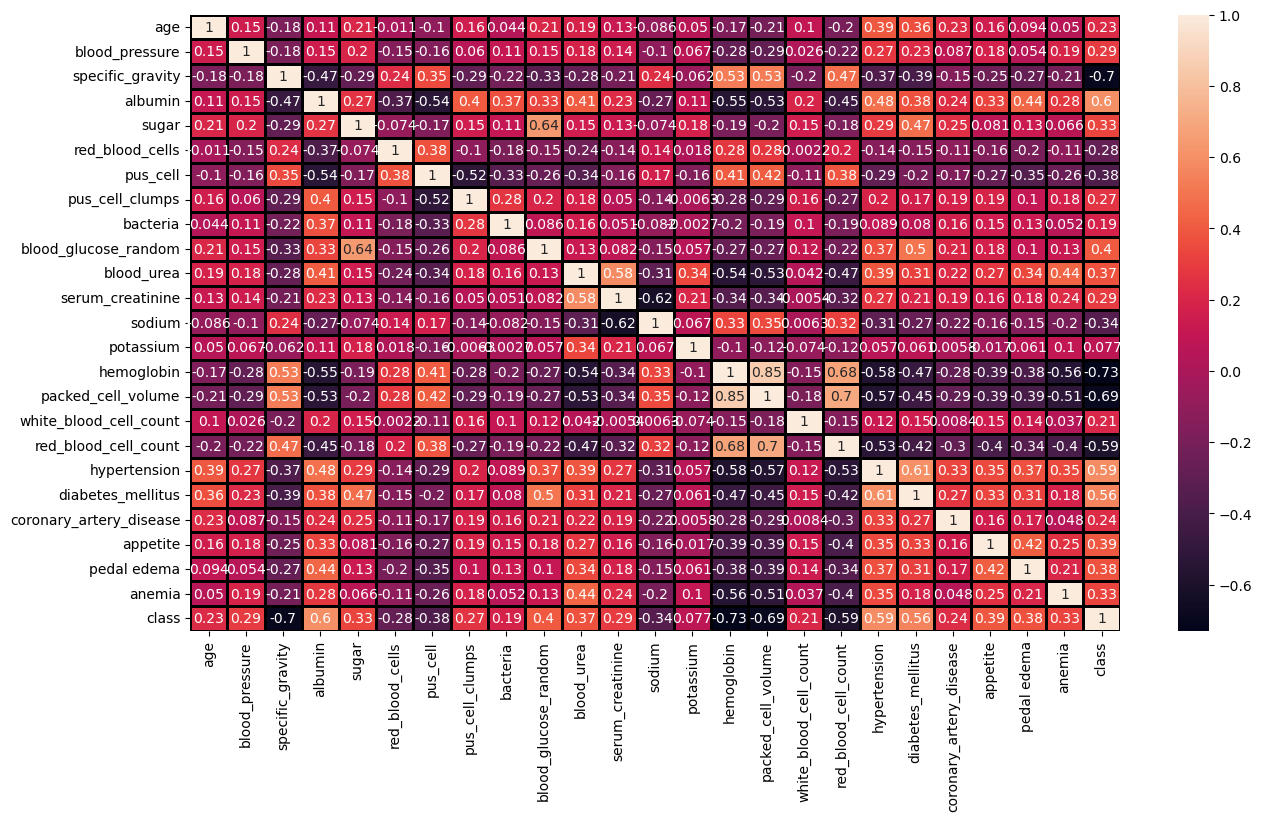

In [49]:
# Plotting a heatmap of the correlation matrix
plt.figure(figsize = (15,8))
sns.heatmap(Dataset.corr(), annot = True, linewidths = 2, linecolor = 'black')
plt.show()

### Feature Selection Using Select KBest

In [50]:
# Splitting the dataset into features (X) and target variable (y)
# 'class' is the target; all other columns are features
Features = Dataset.drop('class', axis = 1)
y = Dataset['class']

In [51]:
# Displaying the features to inspect the final input dataset (without the target column)
Features

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,hemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal edema,anemia
0,48,80.0,1.020,1.0,0.0,1,1,0,0,121.000000,...,15.4,44.0,7800.0,5.200000,1,1,0,0,0,0
1,7,50.0,1.020,4.0,0.0,1,1,0,0,148.036517,...,11.3,38.0,6000.0,4.707435,0,0,0,0,0,0
2,62,80.0,1.010,2.0,3.0,1,1,0,0,423.000000,...,9.6,31.0,7500.0,4.707435,0,1,0,1,0,1
3,48,70.0,1.005,4.0,0.0,1,0,1,0,117.000000,...,11.2,32.0,6700.0,3.900000,1,0,0,1,1,1
4,51,80.0,1.010,2.0,0.0,1,1,0,0,106.000000,...,11.6,35.0,7300.0,4.600000,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55,80.0,1.020,0.0,0.0,1,1,0,0,140.000000,...,15.7,47.0,6700.0,4.900000,0,0,0,0,0,0
396,42,70.0,1.025,0.0,0.0,1,1,0,0,75.000000,...,16.5,54.0,7800.0,6.200000,0,0,0,0,0,0
397,12,80.0,1.020,0.0,0.0,1,1,0,0,100.000000,...,15.8,49.0,6600.0,5.400000,0,0,0,0,0,0
398,17,60.0,1.025,0.0,0.0,1,1,0,0,114.000000,...,14.2,51.0,7200.0,5.900000,0,0,0,0,0,0


In [52]:
# Importing SelectKBest and f_classif for feature selection
from sklearn.feature_selection import SelectKBest, f_classif

In [53]:
# Initializing SelectKBest to select the top 3 features
kbest = SelectKBest(score_func = f_classif, k=3)

In [54]:
# Fitting SelectKBest to the data and transforingm the feature set
kbest.fit_transform(Features,y)

array([[ 1.02 , 15.4  , 44.   ],
       [ 1.02 , 11.3  , 38.   ],
       [ 1.01 ,  9.6  , 31.   ],
       ...,
       [ 1.02 , 15.8  , 49.   ],
       [ 1.025, 14.2  , 51.   ],
       [ 1.025, 15.8  , 53.   ]])

In [55]:
# Getting the indices of the top 3 selected features
feat_indices = kbest.get_support(indices = True)

# Using the indices to retrieve the corresponding feature names
feat_names = Features.columns[feat_indices]
feat_names

Index(['specific_gravity', 'hemoglobin', 'packed_cell_volume'], dtype='object')

In [56]:
# Creating a new feature set using the top 3 features selected by SelectKBest
X = Dataset[['specific_gravity', 'hemoglobin', 'packed_cell_volume']]

In [57]:
# Displaying the final selected feature set (X) with the top 3 predictive features
X

,specific_gravity,hemoglobin,packed_cell_volume
0,1.020,15.4,44.0
1,1.020,11.3,38.0
2,1.010,9.6,31.0
3,1.005,11.2,32.0
4,1.010,11.6,35.0
...,...,...,...
395,1.020,15.7,47.0
396,1.025,16.5,54.0
397,1.020,15.8,49.0
398,1.025,14.2,51.0


### Feature Splitting

In [58]:
# Importing train_test_split to split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

In [59]:
# Split the data into training and testing sets
# 80% for training, 20% for testing, with a fixed random_state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#### Logistic Regression

In [60]:
# Importing LogisticRegression for binary classification
from sklearn.linear_model import  LogisticRegression

In [61]:
# Initializing and train the Logistic Regression model using the training data
lr_model = LogisticRegression().fit(X_train, y_train)

In [62]:
# Predicting the target values for the test set using the trained model
predictions = lr_model.predict(X_test)

# Displaying the predicted values
predictions

array([1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0], dtype=int64)

In [63]:
# Importing accuracy_score to measure the percentage of correct predictions
from sklearn.metrics import accuracy_score

# Importing classification_report to view precision, recall, f1-score, and support
from sklearn.metrics import classification_report

In [64]:
# Calculating the accuracy of the model on the test set
acc = accuracy_score(predictions, y_test)

# Printing the accuracy score
print(f' The accuracy score is {acc}')

 The accuracy score is 0.9625


In [65]:
# Generating a classification report to evaluate precision, recall, F1-score, and support
report = classification_report(y_test, predictions)

# Printing the classification report
print(report)

              precision    recall  f1-score   support

           0       0.93      0.96      0.95        28
           1       0.98      0.96      0.97        52

    accuracy                           0.96        80
   macro avg       0.96      0.96      0.96        80
weighted avg       0.96      0.96      0.96        80



#### Checking Logistic Regression Model's Accuracy

In [66]:
# Predicting the target values for the training set using the trained model
predictions_train = lr_model.predict(X_train)

In [67]:
# Calculating the accuracy of the model on the training set
acc_train = accuracy_score(predictions_train, y_train)

# Printing the training accuracy score
print(f' The accuracy score is {acc_train}')

 The accuracy score is 0.921875


### KNearest Neighbor

In [68]:
# Importing KNeighborsClassifier for training a K-Nearest Neighbors model
from sklearn.neighbors import KNeighborsClassifier

In [69]:
# Initializing and train the K-Nearest Neighbors model using the training set
Knn_model = KNeighborsClassifier().fit(X_train, y_train)

In [70]:
# Predicting the target values for the test set using the trained KNN model
predictions_2 = Knn_model.predict(X_test)

# Displaying the predicted values
predictions_2

array([1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0], dtype=int64)

In [72]:
# Calculating and displaying the accuracy score of the KNN model on the test data
acc_2 = accuracy_score(predictions_2, y_test)

# Printing the accuracy score
print(f' The accuracy score is {acc_2}')

 The accuracy score is 0.9375


In [73]:
# Generating and printing the classification report for the KNN model
report_2 = classification_report(y_test, predictions_2)

# Printing the classification report
print(report_2)

              precision    recall  f1-score   support

           0       0.93      0.89      0.91        28
           1       0.94      0.96      0.95        52

    accuracy                           0.94        80
   macro avg       0.93      0.93      0.93        80
weighted avg       0.94      0.94      0.94        80



#### Checking KNearest Neighbor Model's Accuracy

In [75]:
# Predicting on training data using the KNN model
predictions_train_2 = Knn_model.predict(X_train)

In [76]:
# Calculating and printing the training accuracy score for the KNN model
acc_train_2 = accuracy_score(predictions_train_2, y_train)

print(f' The accuracy score is {acc_train_2}')

 The accuracy score is 0.934375


### Decision Tree

In [77]:
# Importing DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

In [78]:
# Initializing and training the Decision Tree Classifier using the training data
DTC = DecisionTreeClassifier().fit(X_train, y_train)

In [79]:
# Predicting the target values for the test set using the trained Decision Tree model
prediction_3 = DTC.predict(X_test)

# Displaying the predictions
prediction_3

array([1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0], dtype=int64)

In [80]:
# Calculating and printing the accuracy score of the Decision Tree model on the test set
acc_3 = accuracy_score(prediction_3, y_test)

print(f' The accuracy score is {acc_3}')

 The accuracy score is 0.9875


In [81]:
# Generating the classification report for the Decision Tree model
report_3 = classification_report(y_test, prediction_3)

# Displaying the report
print(report_3)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        28
           1       1.00      0.98      0.99        52

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



#### Checking Decision Tree Model's Accuracy

In [84]:
# Predicting the training set labels using the Logistic Regression model
predictions_train_3 = DTC.predict(X_train)

In [86]:
# Calculating the training accuracy score for the selected model
acc_train_3 = accuracy_score(predictions_train_3, y_train)

# Displaying the training accuracy
print(f' The accuracy score is {acc_train_3}')

 The accuracy score is 0.9875


### Random Forest

In [87]:
# Importing the RandomForestClassifier model from sklearn's ensemble module
from sklearn.ensemble import RandomForestClassifier

In [88]:
# Initializing and training the Random Forest Classifier using the training data
RFC = RandomForestClassifier().fit(X_train, y_train)

In [89]:
 # Using the trained Random Forest model to make predictions on the test data
prediction_4 = RFC.predict(X_test)

# Displaying the predicted values for the test set
prediction_4

array([1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0], dtype=int64)

In [90]:
# Calculating the accuracy of the Random Forest model using test predictions
acc_4 = accuracy_score(prediction_4, y_test)

 # Printing the accuracy score
print(f' The accuracy score is {acc_4}')

 The accuracy score is 0.9875


In [91]:
# Generating a classification report for the Random Forest model
report_4 = classification_report(y_test, prediction_4)

# Displaingy precision, recall, f1-score, and support for each class
print(report_4)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        28
           1       1.00      0.98      0.99        52

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



#### Checking Random Forest Model's Accuracy

In [94]:
# Making predictions on the training data using the trained Random Forest Classifier
predictions_train_4 = RFC.predict(X_train)

In [96]:
# Calculating the accuracy score on the training set for the Random Forest model
acc_train_4 = accuracy_score(predictions_train_4, y_train)

# Printing the training accuracy score
print(f' The accuracy score is {acc_train_4}')

 The accuracy score is 0.9875


## Model Performance Summary
Logistic Regression: Best generalization performance with a test accuracy of 96.25%. No signs of overfitting. Reliable and interpretable.

K-Nearest Neighbours (KNN): Balanced accuracy (93.75%) on both train and test sets. Performs well but may not scale efficiently.

Decision Tree: High accuracy (98.75%) on both sets, but likely overfitting due to perfect memorization.

Random Forest: Also achieved 98.75% accuracy. More robust than Decision Tree but still shows potential overfitting.

### Recommendation
Use Logistic Regression for interpretability and generalization. 

Consider Random Forest if you need maximum accuracy and can manage complexity.



### Deploying the model

In [73]:
import joblib

In [74]:
filename = 'Kidney_Disease_Classifier.joblib'
joblib.dump(RFC, filename)

['Kidney_Disease_Classifier.joblib']